# Edge Detection
Your code will take as input a grayscale image *im* (a torch.Tensor with dtype torch.uint8 and shape (H,W)). It needs then to:

1. Apply the horizontal and vertical Sobel masks (with a kernel size of 3) to obtain horizontal and vertical derivatives;
2. Compute the magnitude and direction of the gradient, and normalize them properly (see slides);
3. Diplay the gradient magnitude and derivative jointly in an HSV image, and then convert it in RGB format (see slides).

torch.Size([128, 128])
tensor(6, dtype=torch.uint8) tensor(218, dtype=torch.uint8)


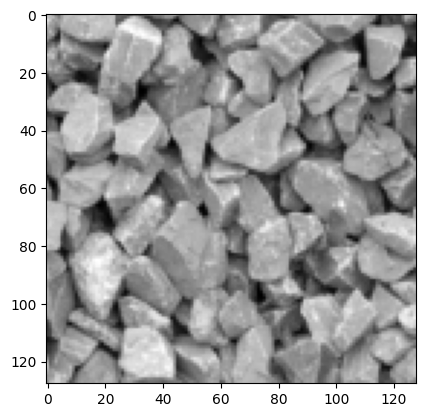

In [70]:
import torch
from skimage import data
import cv2
from matplotlib import pyplot as plt

im = data.gravel()
im = im[:128,:128]
im = torch.from_numpy(im)
#toShow = torch.tensor()
plt.imshow(im,cmap='gray')
print(im.shape)

print(im.min(), im.max())


In [71]:
im = im.to(torch.float32)

#creating sobel kernels:
s_x = torch.tensor([[-1,0,1], [-2,0,2], [-1,0,1]])
s_y = torch.tensor([[1,2,1], [0,0,0], [-1,-2,-1]])

sobel= torch.stack((s_x, s_y), 0)
kH = 3
kW = 3
#applying convolutions
wo = int((im.shape[0] - kW)/1 + 1)
ho = int((im.shape[1] - kH)/1 + 1)
out = torch.zeros((2,ho,wo))

for i in range(wo):
    for j in range(ho):
        img = im[j:j+kH,i:i+kW]
        #im = torch.unsqueeze(im, dim=1) #now im.shape is (1,kH,kW) -->ready for broadcasting
        res = img*sobel
        out[:,j,i] = res.sum((1,2)) / 8

print(out.shape)




torch.Size([2, 126, 126])


In [72]:
#show results after conv
fig = plt.figure(figsize=(500, 500))
for i in range(2):
    #fig.add_subplot(wo, ho, i+1)
    #plt.imshow(out[i],cmap='gray')
    print(out[i].min(), out[i].max())
plt.show()

tensor(-78.7500) tensor(68.5000)
tensor(-73.5000) tensor(57.8750)


<Figure size 50000x50000 with 0 Axes>

tensor(0, dtype=torch.uint8) tensor(254, dtype=torch.uint8)
tensor(0, dtype=torch.uint8) tensor(180, dtype=torch.uint8)


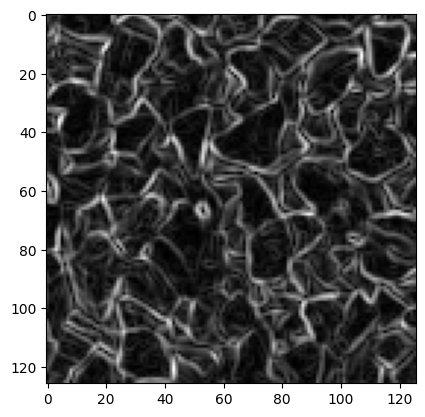

In [79]:
#applying normalization
mG = torch.sqrt(torch.pow(out[0], 2) + torch.pow(out[1], 2))
max = mG.max()
mG = mG *255/max
mG = (torch.floor(mG)).to(torch.uint8)
plt.imshow(mG,cmap="gray")
print(mG.min(), mG.max())

dG = torch.arctan2(out[1], out[0])
pi = torch.pi
dG = dG *90/pi + 90 #in degrees


dG = (torch.floor(dG)).to(torch.uint8)

print(dG.min(), dG.max())


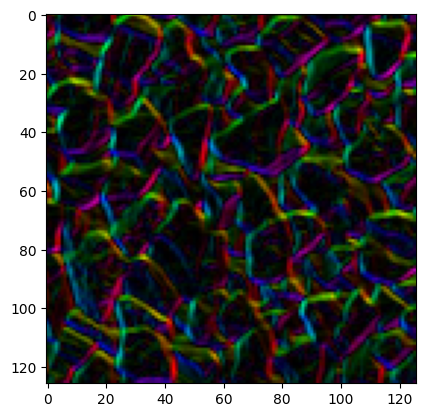

In [80]:
#lets create a HSV image
hsv = torch.zeros(ho,wo,3).to(torch.uint8)
hsv[:,:,0] = dG #h
hsv[:,:,1] = 255 #s
hsv[:,:,2] = mG #v

rgb = cv2.cvtColor(hsv.numpy(), cv2.COLOR_HSV2RGB)
plt.imshow(rgb)
